In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_auc_score,roc_curve,f1_score
from sklearn.linear_model import LogisticRegression

# 1. Load Data

In [5]:
employee = pd.read_csv('./Employee_data.csv')
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
employee.rename(columns= {"sales": "department"},inplace = True)
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
employee.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 2. Data Visualization

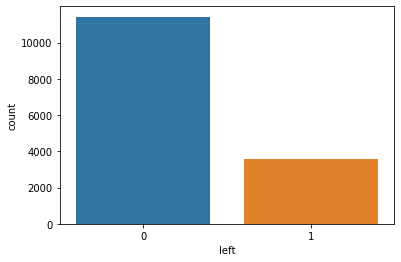

In [9]:
sns.countplot(x="left",data=employee)

In [10]:
employee.left.value_counts()/len(employee.left)

0    0.761917
1    0.238083
Name: left, dtype: float64

 76% stayed and only 24% left

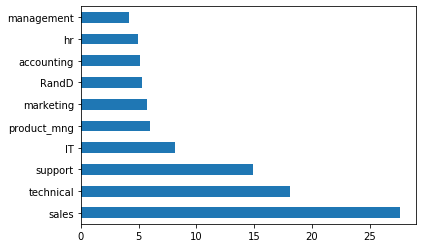

In [11]:
((employee.department.value_counts()/len(employee.department))*100).plot(kind='barh')

More than 25% are in sales department, followed by approx 18% in technical.

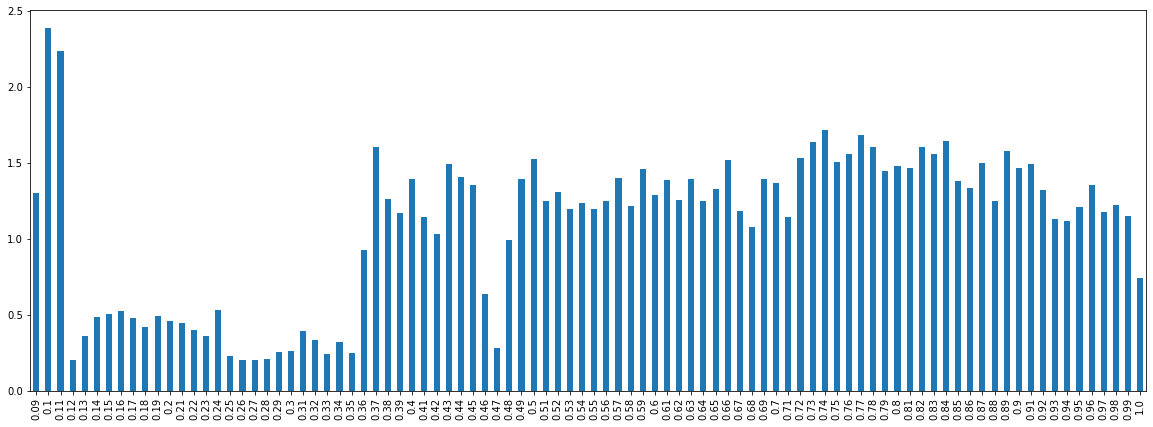

In [12]:
plt.figure(figsize=(20,7))
((employee.satisfaction_level.value_counts().sort_index()/len(employee.satisfaction_level))*100).plot(kind='bar')

Highest percent is 2.4% for 0.10, second highest is 2.3% approx for 0.11

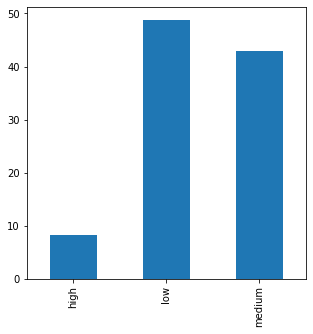

In [13]:
plt.figure(figsize=(5,5))
((employee.salary.value_counts().sort_index()/len(employee.salary))*100).plot(kind='bar')

Most of them are in low and medium income group. Less than 10% are in high.

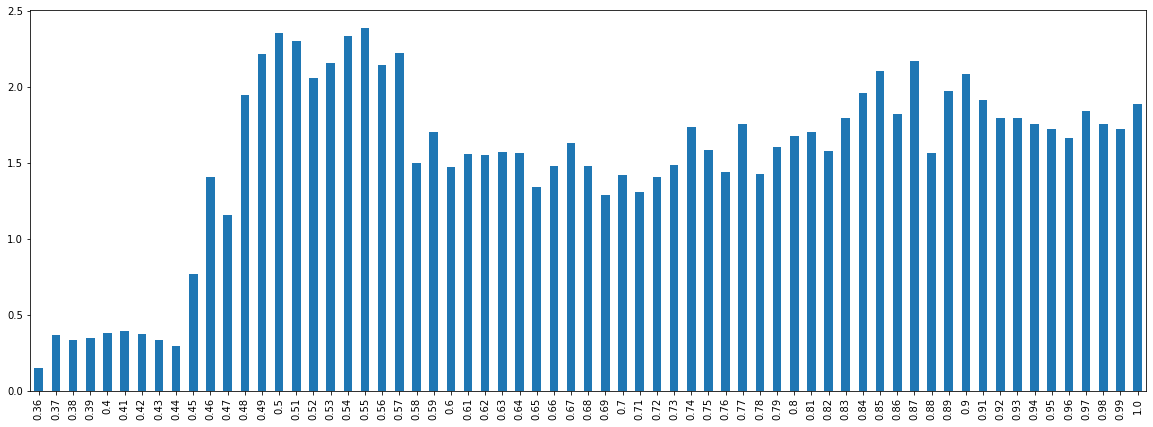

In [14]:
plt.figure(figsize=(20,7))
((employee.last_evaluation.value_counts().sort_index()/len(employee.last_evaluation))*100).plot(kind='bar')

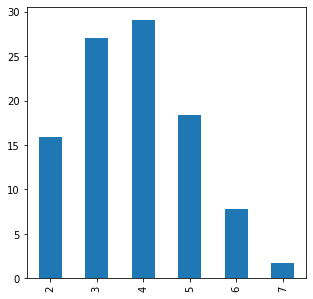

In [15]:
plt.figure(figsize=(5,5))
((employee.number_project.value_counts().sort_index()/len(employee.number_project))*100).plot(kind='bar')

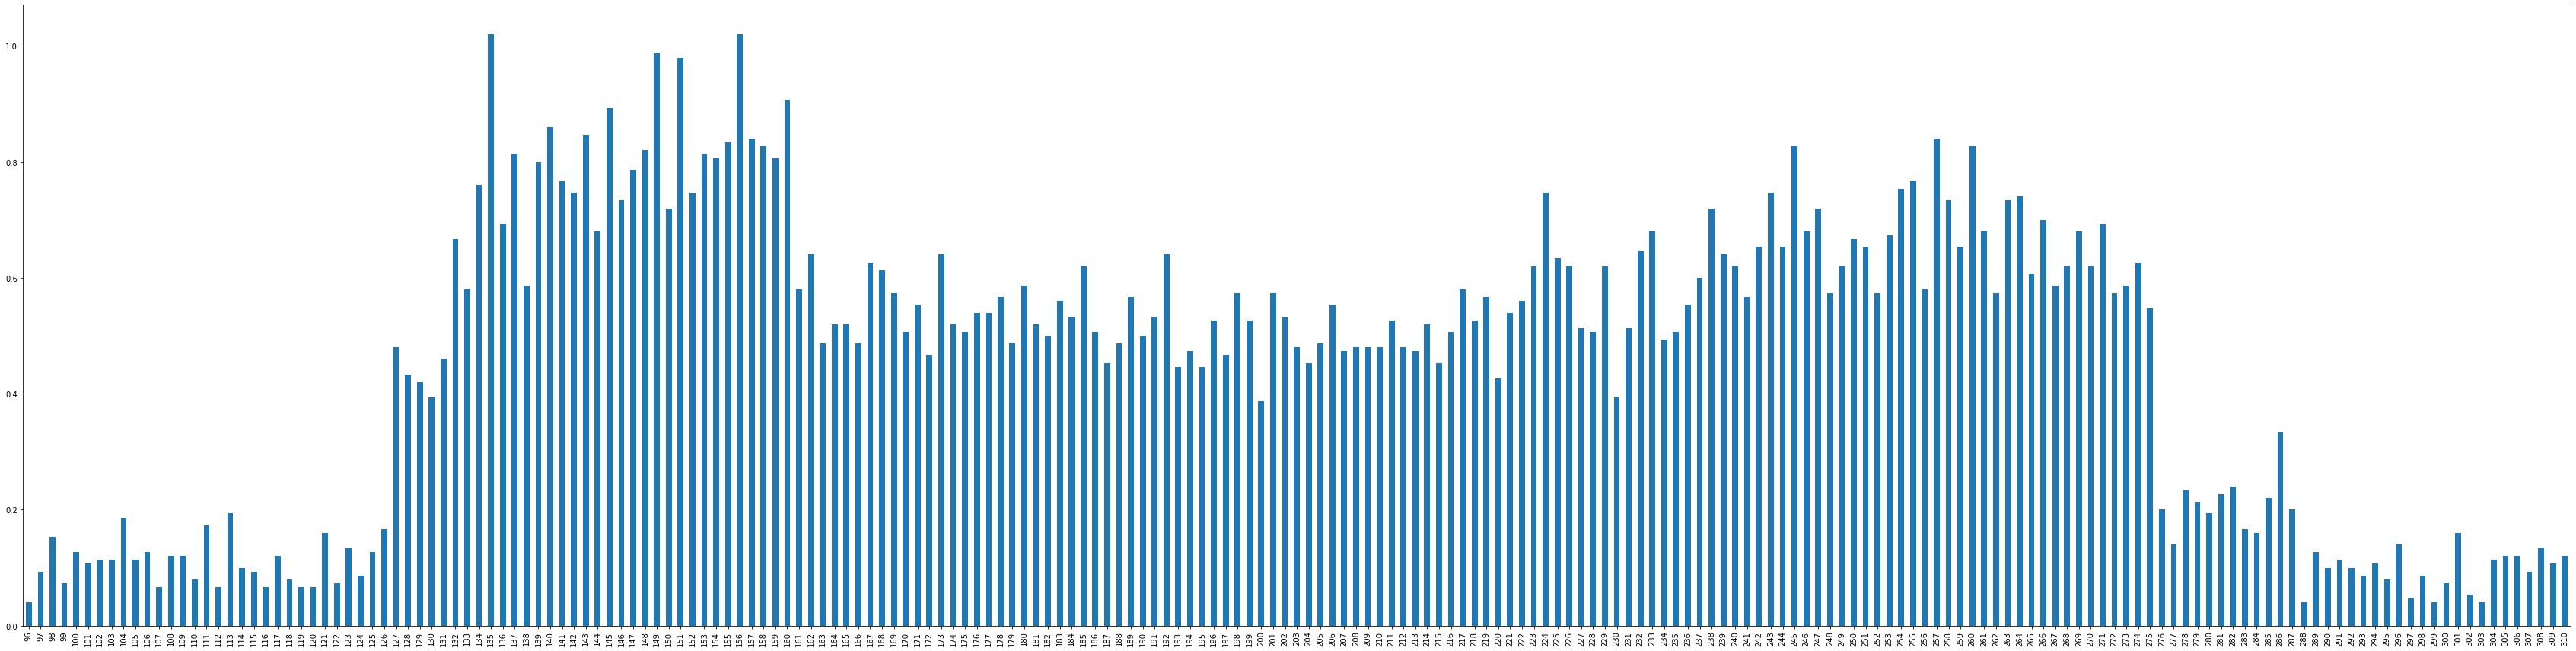

In [16]:
plt.figure(figsize=(60,15))
((employee.average_montly_hours.value_counts().sort_index()/len(employee.average_montly_hours))*100).plot(kind='bar')

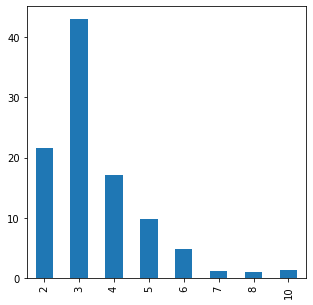

In [17]:
plt.figure(figsize=(5,5))
((employee.time_spend_company.value_counts().sort_index()/len(employee.time_spend_company))*100).plot(kind='bar')

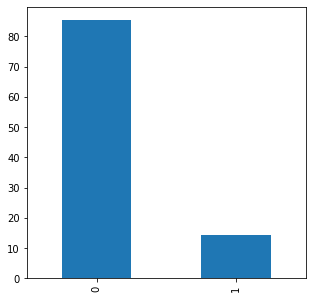

In [18]:
plt.figure(figsize=(5,5))
((employee.Work_accident.value_counts().sort_index()/len(employee.Work_accident))*100).plot(kind='bar')

1 = Work Accident

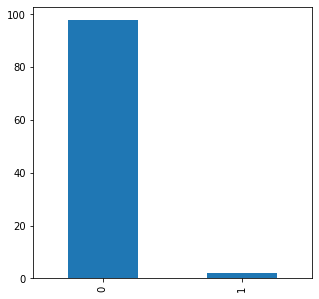

In [19]:
plt.figure(figsize=(5,5))
((employee.promotion_last_5years.value_counts().sort_index()/len(employee.promotion_last_5years))*100).plot(kind='bar')

Percent left and stayed based on satisfaction level

In [20]:
# ax = pd.Series((employee[employee.left==0].satisfaction_level.value_counts()/len(employee.left))*100).sort_index().plot(kind='bar',color='g',figsize=(20,7))
# pd.Series((employee[employee.left==1].satisfaction_level.value_counts()/len(employee.left))*100).sort_index().plot(kind='bar',color='r',alpha= 0.7,figsize=(20,7), ax=ax)
# ax.legend(["Stayed", "Left"])

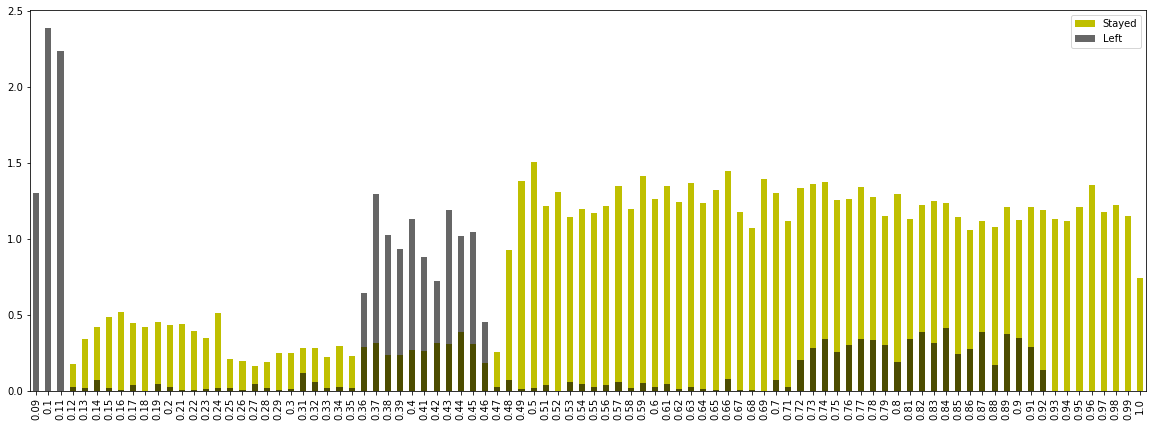

In [21]:
employee.satisfaction_level = employee.satisfaction_level.astype('category')
ax = pd.Series((employee[employee.left==0].satisfaction_level.value_counts()/len(employee.left))*100).sort_index().plot(kind='bar',color='y',figsize=(20,7))
pd.Series((employee[employee.left==1].satisfaction_level.value_counts()/len(employee.left))*100).sort_index().plot(kind='bar',color='black',alpha= 0.6,figsize=(20,7), ax=ax)
ax.legend(["Stayed", "Left"])

All the employees who voted below 0.12 have left the company, no surprise there, but majority of employees who voted 0.12 to 0.35 have stayed on while who have voted 0.36 - 0.46 have left. 
Leaving percentage is consistently low afterward, till 0.71. 
None of the employees who voted beyond 0.93 have left the company. The relation is obviously not linear; Logistic Regression might perform poorly here unless we include some polynomial degrees.

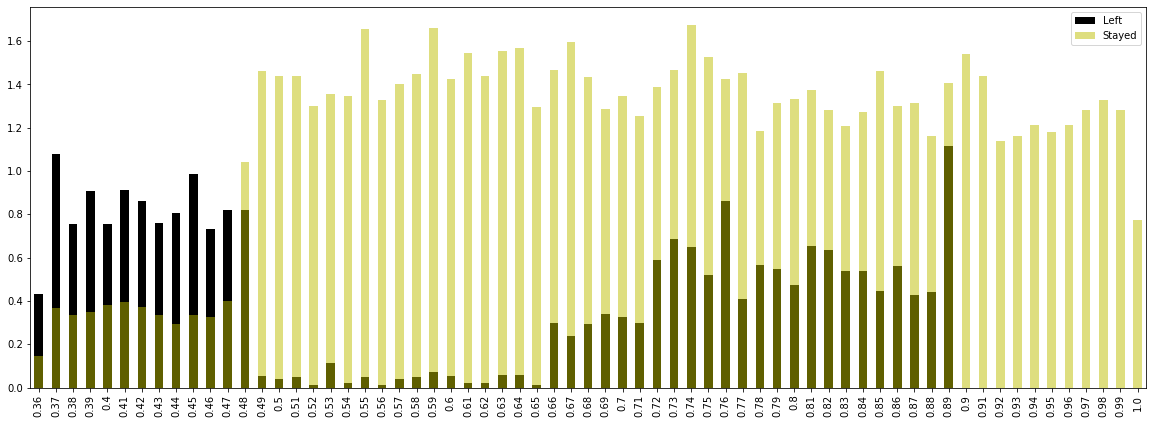

In [22]:
plt.figure(figsize=(20,7))
((employee[employee.left==1].last_evaluation.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='black')
((employee[employee.left==0].last_evaluation.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='y',alpha=0.5)
plt.legend(["Left", "Stayed"])

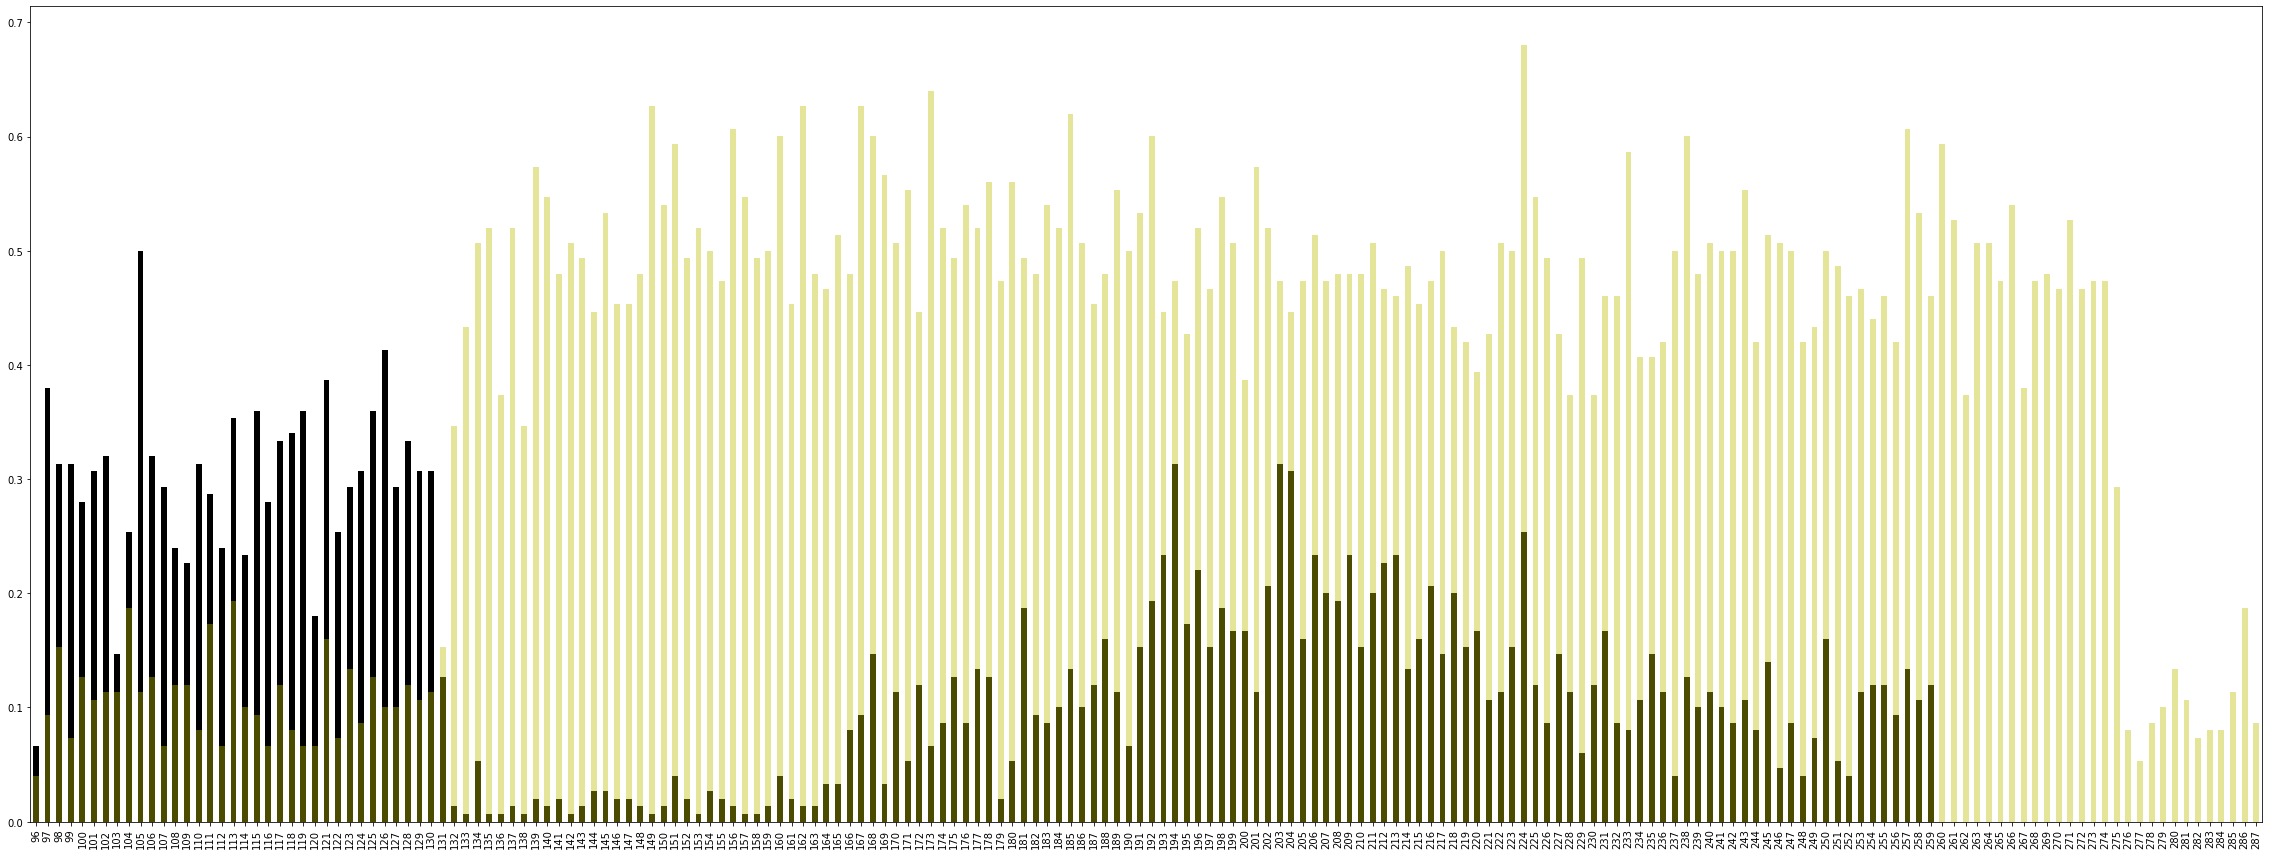

In [23]:
plt.figure(figsize=(40,15))
((employee[employee.left==1].average_montly_hours.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='black')
((employee[employee.left==0].average_montly_hours.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='y',alpha=0.4)

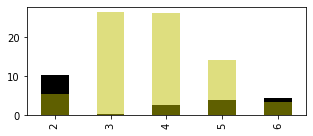

In [24]:
plt.figure(figsize=(5,2))
((employee[employee.left==1].number_project.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='black')
((employee[employee.left==0].number_project.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='y', alpha = 0.5)


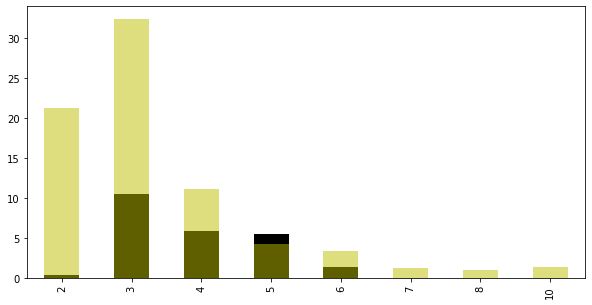

In [25]:
plt.figure(figsize=(10,5))
((employee[employee.left==1].time_spend_company.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='black')
((employee[employee.left==0].time_spend_company.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='y',alpha=0.5)

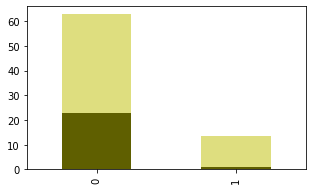

In [26]:
plt.figure(figsize=(5,3))
((employee[employee.left==1].Work_accident.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='black')
((employee[employee.left==0].Work_accident.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='y',alpha=0.5)

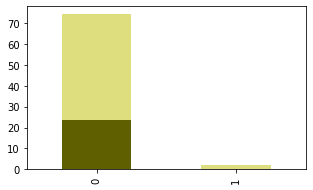

In [27]:
plt.figure(figsize=(5,3))
((employee[employee.left==1].promotion_last_5years.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='black')
((employee[employee.left==0].promotion_last_5years.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='y',alpha=0.5)

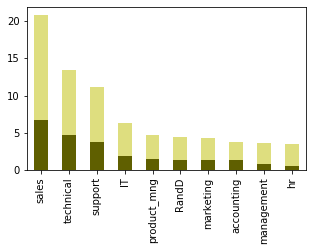

In [28]:
plt.figure(figsize=(5,3))
((employee[employee.left==1].department.value_counts()/len(employee.left))*100).plot(kind='bar',color='black')
((employee[employee.left==0].department.value_counts()/len(employee.left))*100).plot(kind='bar',color='y',alpha=0.5)

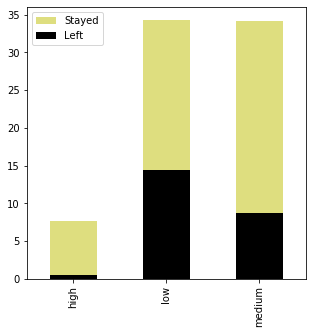

In [29]:
plt.figure(figsize=(5,5))
ax = ((employee[employee.left==0].salary.value_counts().sort_index()/len(employee.left))*100).plot(kind='bar',color='y',alpha = 0.5)
((employee[employee.left==1].salary.value_counts().sort_index()/len(employee.left)*100)).plot(kind='bar',color='black', ax= ax)
ax.legend(["Stayed", "Left"])

# 3. Feature Engineering

###  Label encoding salary column because low < medium < high

In [30]:
salary_dict = {"low": 0, "medium": 1, "high": 2}
employee['sal_numeric'] = employee['salary'].map(salary_dict)
employee.drop('salary', inplace=True, axis=1)

### Onehot encoding for department

In [31]:
employee = pd.concat([employee, pd.get_dummies(employee['department'],prefix='dept', prefix_sep='_')], axis=1)
employee.drop('department', inplace=True, axis=1)

### Features based on vizualization

In [32]:
y = employee.left.values
employee.drop('left', inplace=True, axis=1)
employee_new = employee.copy()

Time Spent Encoding

In [33]:
time_spend_comp_dict = { 2: "low", 3 : "medium", 4 : "medium", 6 : "medium", 5: "high", 7: "very low", 8: "very low", 10: "very low"}
employee_new['time_spend_company_cat'] = employee_new['time_spend_company'].map(time_spend_comp_dict)
employee_new = pd.concat([employee_new, pd.get_dummies(employee_new['time_spend_company_cat'],prefix='tsc', prefix_sep='_')], axis=1)
employee_new.drop('time_spend_company_cat', inplace=True, axis=1)
employee_new.drop('time_spend_company', inplace=True, axis=1)

Number Project Encoding

In [34]:
number_project_dict = { 3: "low", 4 : "medium", 5 : "medium",  2: "high", 6: "high", 7: "Very high"}
employee_new['number_project_cat'] = employee_new['number_project'].map(number_project_dict)
employee_new = pd.concat([employee_new, pd.get_dummies(employee_new['number_project_cat'],prefix='np', prefix_sep='_')], axis=1)
employee_new.drop('number_project_cat', inplace=True, axis=1)
employee_new.drop('number_project', inplace=True, axis=1)

Bins

Satisfaction Level

In [35]:
bins = [0, 0.11, 0.35, 0.46, 0.71, 0.92,1.0]
employee_new['satisfaction_level_bin'] = pd.cut(employee_new.satisfaction_level,bins)
employee_new = pd.concat([employee_new, pd.get_dummies(employee_new['satisfaction_level_bin'],prefix='sts', prefix_sep='_')], axis=1)
employee_new.drop('satisfaction_level', inplace=True, axis=1)
employee_new.drop('satisfaction_level_bin', inplace=True, axis=1)

Last Evaluation

In [36]:
bins = [0, 0.47, 0.48, 0.65, 0.88, 0.89,1.0]
employee_new['last_evaluation_bin'] = pd.cut(employee_new.last_evaluation,bins)
employee_new = pd.concat([employee_new, pd.get_dummies(employee_new['last_evaluation_bin'],prefix='le', prefix_sep='_')], axis=1)
employee_new.drop('last_evaluation_bin', inplace=True, axis=1)
employee_new.drop('last_evaluation', inplace=True, axis=1)

Average Monthly

In [37]:
bins = [96, 131, 165, 178, 179, 259, 287]
employee_new['average_montly_hours_bin'] = pd.cut(employee_new.average_montly_hours,bins)
employee_new = pd.concat([employee_new, pd.get_dummies(employee_new['average_montly_hours_bin'],prefix='am', prefix_sep='_')], axis=1)
employee_new.drop('average_montly_hours_bin', inplace=True, axis=1)
employee_new.drop('average_montly_hours', inplace=True, axis=1)

In [38]:
employee_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 39 columns):
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
sal_numeric              14999 non-null int64
dept_IT                  14999 non-null uint8
dept_RandD               14999 non-null uint8
dept_accounting          14999 non-null uint8
dept_hr                  14999 non-null uint8
dept_management          14999 non-null uint8
dept_marketing           14999 non-null uint8
dept_product_mng         14999 non-null uint8
dept_sales               14999 non-null uint8
dept_support             14999 non-null uint8
dept_technical           14999 non-null uint8
tsc_high                 14999 non-null uint8
tsc_low                  14999 non-null uint8
tsc_medium               14999 non-null uint8
tsc_very low             14999 non-null uint8
np_Very high             14999 non-null uint8
np_high                  14999 non-null uint8
np_low           

In [39]:
employee_new.head()

,Work_accident,promotion_last_5years,sal_numeric,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,...,"le_(0.48, 0.65]","le_(0.65, 0.88]","le_(0.88, 0.89]","le_(0.89, 1.0]","am_(96, 131]","am_(131, 165]","am_(165, 178]","am_(178, 179]","am_(179, 259]","am_(259, 287]"
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


# 4. Models

In [40]:
conf_mat = dict()
fpr = dict()
tpr = dict()
roc_auc = dict()
accuracy = dict()
f1 = dict()

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('std_scalar', StandardScaler())])

In [105]:
# Original Data

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(employee, y,test_size=0.4, random_state = 43)
X_train_1 = num_pipeline.fit_transform(X_train_1)
X_test_1 = num_pipeline.transform(X_test_1)
X_train_1.shape, y_test_1.shape

((8999, 18), (6000,))

In [43]:
# New Data

X_train, X_test, y_train, y_test = train_test_split(employee_new, y, test_size=0.4, random_state = 43)
X_train_tr = num_pipeline.fit_transform(X_train)
X_test_tr = num_pipeline.transform(X_test)

In [44]:
# New Data + Polynomial degree

from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(2)
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(pol.fit_transform(employee_new.values), y, test_size=0.4, random_state=43)
X_train_pol = num_pipeline.fit_transform(X_train_pol)
X_test_pol = num_pipeline.transform(X_test_pol)

## 4.1 Linear Models

## 4.1.1 Logistic Regression on original data

In [45]:
lr = LogisticRegression()
lr.fit(X_train_1,y_train_1)
lr_pred_orig = lr.predict_proba(X_test_1)

In [46]:
fpr['LR Without FE'], tpr['LR Without FE'], threshold = roc_curve(y_test_1, lr_pred_orig[:,1])
roc_auc['LR Without FE'] = roc_auc_score(y_test_1, lr_pred_orig[:,1])
accuracy['LR Without FE'] = accuracy_score(y_test_1, np.argmax(lr_pred_orig,axis = 1))
f1['LR Without FE'] = f1_score(y_test_1, np.argmax(lr_pred_orig,axis = 1))
conf_mat['LR Without FE'] = confusion_matrix(y_test_1, np.argmax(lr_pred_orig,axis = 1))
print(fpr['LR Without FE'])
print(tpr['LR Without FE'])
print(roc_auc['LR Without FE'])
print(accuracy['LR Without FE'])
print(f1['LR Without FE'])
print(conf_mat['LR Without FE'])
print(confusion_matrix(y_test_1, np.argmax(lr_pred_orig,axis = 1)))
print(classification_report(y_test_1, np.argmax(lr_pred_orig,axis = 1)))

[0.00000000e+00 2.18245308e-04 6.54735923e-04 ... 9.98908773e-01
 9.99345264e-01 1.00000000e+00]
[0. 0. 0. ... 1. 1. 1.]
0.8242717409572875
0.7865
0.4293986636971047
[[4237  345]
 [ 936  482]]
[[4237  345]
 [ 936  482]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4582
           1       0.58      0.34      0.43      1418

    accuracy                           0.79      6000
   macro avg       0.70      0.63      0.65      6000
weighted avg       0.76      0.79      0.76      6000



Text(0.5, 15.0, 'Predicted label')

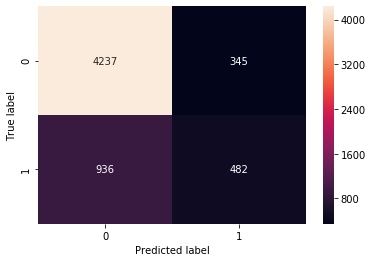

In [47]:
sns.heatmap(confusion_matrix(y_test_1, np.argmax(lr_pred_orig,axis = 1)),annot = True, fmt = 'g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## 4.1.2 Logistic regression on new data

In [48]:
lr_new = LogisticRegression()
lr_new.fit(X_train,y_train)
lr_pred_new = lr_new.predict_proba(X_test)

In [49]:
fpr['LR With FE'], tpr['LR With FE'], threshold = roc_curve(y_test, lr_pred_new[:,1])
roc_auc['LR With FE'] = roc_auc_score(y_test, lr_pred_new[:,1])
accuracy['LR With FE'] = accuracy_score(y_test, np.argmax(lr_pred_new,axis = 1))
f1['LR With FE'] = f1_score(y_test, np.argmax(lr_pred_new,axis = 1))
conf_mat['LR With FE'] = confusion_matrix(y_test, np.argmax(lr_pred_new,axis = 1))
print(fpr['LR With FE'])
print(tpr['LR With FE'])
print(roc_auc['LR With FE'])
print(accuracy['LR With FE'])
print(f1['LR With FE'])
print(conf_mat['LR With FE'])
print(confusion_matrix(y_test, np.argmax(lr_pred_new,axis = 1)))
print(classification_report(y_test, np.argmax(lr_pred_new,axis = 1)))

[0.         0.         0.         ... 0.99847228 0.99890877 1.        ]
[0.         0.00141044 0.00282087 ... 1.         1.         1.        ]
0.9669693884021551
0.9451666666666667
0.8820365722481176
[[4441  141]
 [ 188 1230]]
[[4441  141]
 [ 188 1230]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4582
           1       0.90      0.87      0.88      1418

    accuracy                           0.95      6000
   macro avg       0.93      0.92      0.92      6000
weighted avg       0.94      0.95      0.94      6000



Text(0.5, 15.0, 'Predicted label')

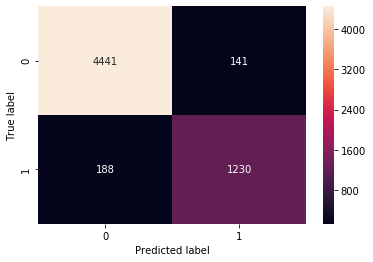

In [50]:
sns.heatmap(confusion_matrix(y_test, np.argmax(lr_pred_new,axis = 1)),annot = True, fmt = 'g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## 4.1.3 Logistic Regression after adding Polynomial features

In [51]:
lr_pol = LogisticRegression()
lr_pol.fit(X_train_pol,y_train_pol)
lr_pred_pol = lr_pol.predict_proba(X_test_pol)

In [52]:
fpr['LR FE Poly'], tpr['LR FE Poly'], threshold = roc_curve(y_test_pol, lr_pred_pol[:,1])
roc_auc['LR FE Poly'] = roc_auc_score(y_test_pol, lr_pred_pol[:,1])
accuracy['LR FE Poly'] = accuracy_score(y_test_pol, np.argmax(lr_pred_pol,axis = 1))
f1['LR FE Poly'] = f1_score(y_test_pol, np.argmax(lr_pred_pol,axis = 1))
conf_mat['LR FE Poly'] = confusion_matrix(y_test_pol, np.argmax(lr_pred_pol,axis = 1))
print(fpr['LR FE Poly'])
print(tpr['LR FE Poly'])
print(roc_auc['LR FE Poly'])
print(accuracy['LR FE Poly'])
print(f1['LR FE Poly'])
print(conf_mat['LR FE Poly'])
print(confusion_matrix(y_test_pol, np.argmax(lr_pred_pol,axis = 1)))
print(classification_report(y_test_pol, np.argmax(lr_pred_pol,axis = 1)))

[0.         0.         0.         ... 0.99803579 0.99847228 1.        ]
[0.         0.06699577 0.06840621 ... 1.         1.         1.        ]
0.979649625473814
0.959
0.9123307198859586
[[4474  108]
 [ 138 1280]]
[[4474  108]
 [ 138 1280]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4582
           1       0.92      0.90      0.91      1418

    accuracy                           0.96      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.96      0.96      0.96      6000



Text(0.5, 15.0, 'Predicted label')

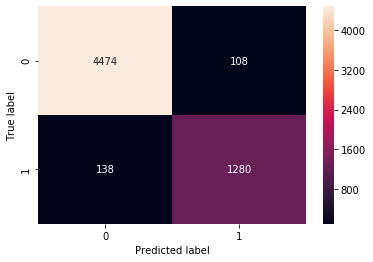

In [53]:
sns.heatmap(confusion_matrix(y_test_pol, np.argmax(lr_pred_pol,axis = 1)),annot = True, fmt = 'g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## 4.1.4 Linear SVM on original data

In [54]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
lsvc_orig = LinearSVC()
param_grid = {'C': [0.01,0.1,1,10,100]}

In [55]:
grid_search = GridSearchCV(lsvc_orig, param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(X_train_1, y_train_1)
cvres = grid_search.cv_results_

In [56]:
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(mean_score,params)

0.8164983145779082 {'C': 0.01}
0.8166780453284443 {'C': 0.1}
0.8166872022738119 {'C': 1}
0.8138233586756027 {'C': 10}
0.6680652825152855 {'C': 100}


In [57]:
print("\nBest parameters")
print(grid_search.best_params_)

print("\nBest estimator")
print(grid_search.best_estimator_)

print("\nBest AUC score")
print(grid_search.best_score_)


Best parameters
{'C': 1}

Best estimator
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Best AUC score
0.8166872022738119


In [58]:
lsvc_orig_model = grid_search.best_estimator_
lsvc_orig_model.fit(X_train_1, y_train_1)
lsvc_orig_predictions = lsvc_orig_model.predict(X_test_1)
lsvc_orig_auc = roc_auc_score(y_test_1, lsvc_orig_predictions)
print("\nAUC for test set: ", lsvc_orig_auc)


AUC for test set:  0.5979892188664911


In [59]:
fpr['LSVC orig'], tpr['LSVC orig'], threshold = roc_curve(y_test_1, lsvc_orig_predictions)
roc_auc['LSVC orig'] = roc_auc_score(y_test_1, lsvc_orig_predictions)
accuracy['LSVC orig'] = accuracy_score(y_test_1, lsvc_orig_predictions)
f1['LSVC orig'] = f1_score(y_test_1, lsvc_orig_predictions)
conf_mat['LSVC orig'] = confusion_matrix(y_test_1, lsvc_orig_predictions)
print(fpr['LSVC orig'])
print(tpr['LSVC orig'])
print(roc_auc['LSVC orig'])
print(accuracy['LSVC orig'])
print(f1['LSVC orig'])
print(conf_mat['LSVC orig'])
print(confusion_matrix(y_test_1, lsvc_orig_predictions))
print(classification_report(y_test_1, lsvc_orig_predictions))

[0.         0.06918376 1.        ]
[0.        0.2651622 1.       ]
0.5979892188664911
0.7735
0.35622927522501185
[[4265  317]
 [1042  376]]
[[4265  317]
 [1042  376]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4582
           1       0.54      0.27      0.36      1418

    accuracy                           0.77      6000
   macro avg       0.67      0.60      0.61      6000
weighted avg       0.74      0.77      0.74      6000



Text(0.5, 15.0, 'Predicted label')

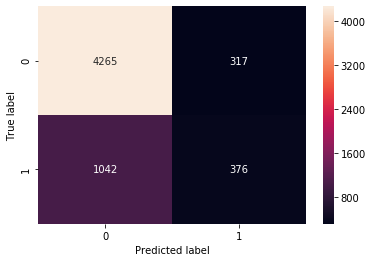

In [60]:
sns.heatmap(confusion_matrix(y_test_1, lsvc_orig_predictions),annot = True, fmt = 'g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## 4.1.5 Linear SVM on new data

In [61]:
lsvc_new = LinearSVC()
param_grid = {'C': [0.01,0.1,1,10,100]}

In [62]:
grid_search = GridSearchCV(lsvc_new, param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(X_train_tr, y_train)
cvres = grid_search.cv_results_

In [63]:
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(mean_score,params)

0.9665816283044494 {'C': 0.01}
0.9688140026121409 {'C': 0.1}
0.9691965098181635 {'C': 1}
0.9659469668591254 {'C': 10}
0.9557626509563261 {'C': 100}


In [64]:
print("\nBest parameters")
print(grid_search.best_params_)

print("\nBest estimator")
print(grid_search.best_estimator_)

print("\nBest AUC score")
print(grid_search.best_score_)


Best parameters
{'C': 1}

Best estimator
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Best AUC score
0.9691965098181635


In [65]:
lsvc_new_model = grid_search.best_estimator_
lsvc_new_model.fit(X_train_tr, y_train)
lsvc_new_predictions = lsvc_new_model.predict(X_test_tr)
lsvc_new_auc = roc_auc_score(y_test, lsvc_new_predictions)
print("\nAUC for test set: ", lsvc_new_auc)


AUC for test set:  0.9194901063153235


In [66]:
fpr['LSVC new'], tpr['LSVC new'], threshold = roc_curve(y_test, lsvc_new_predictions)
roc_auc['LSVC new'] = roc_auc_score(y_test, lsvc_new_predictions)
accuracy['LSVC new'] = accuracy_score(y_test, lsvc_new_predictions)
f1['LSVC new'] = f1_score(y_test, lsvc_new_predictions)
conf_mat['LSVC new'] = confusion_matrix(y_test, lsvc_new_predictions)
print(fpr['LSVC new'])
print(tpr['LSVC new'])
print(roc_auc['LSVC new'])
print(accuracy['LSVC new'])
print(f1['LSVC new'])
print(conf_mat['LSVC new'])
print(confusion_matrix(y_test, lsvc_new_predictions))
print(classification_report(y_test, lsvc_new_predictions))

[0.         0.03055434 1.        ]
[0.         0.86953456 1.        ]
0.9194901063153235
0.9458333333333333
0.8835542816194911
[[4442  140]
 [ 185 1233]]
[[4442  140]
 [ 185 1233]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4582
           1       0.90      0.87      0.88      1418

    accuracy                           0.95      6000
   macro avg       0.93      0.92      0.92      6000
weighted avg       0.95      0.95      0.95      6000



Text(0.5, 15.0, 'Predicted label')

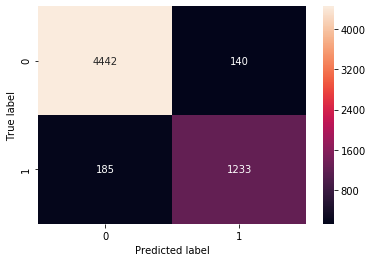

In [67]:
sns.heatmap(confusion_matrix(y_test, lsvc_new_predictions),annot = True, fmt = 'g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# knn

In [68]:
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1,15)
param_grid = dict(n_neighbors=k_range)
knnModel = KNeighborsClassifier()
grid_search = GridSearchCV(knnModel, param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(X_train_tr, y_train)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(mean_score,params)
#knnModel.fit(X_train,y_train)
#knn_pred = knnModel.predict(X_test)

0.9320943248037341 {'n_neighbors': 1}
0.9522080849493654 {'n_neighbors': 2}
0.9558154018267604 {'n_neighbors': 3}
0.959341160587558 {'n_neighbors': 4}
0.9621582008969907 {'n_neighbors': 5}
0.9618424735767082 {'n_neighbors': 6}
0.9616488354420469 {'n_neighbors': 7}
0.9616339930615763 {'n_neighbors': 8}
0.9624901772748544 {'n_neighbors': 9}
0.9638060589687706 {'n_neighbors': 10}
0.9640866524073359 {'n_neighbors': 11}
0.9639317133394909 {'n_neighbors': 12}
0.9637330497808736 {'n_neighbors': 13}
0.9638157445602917 {'n_neighbors': 14}


In [69]:
print("\nBest parameters")
print(grid_search.best_params_)

print("\nBest estimator")
print(grid_search.best_estimator_)

print("\nBest AUC score")
print(grid_search.best_score_)


Best parameters
{'n_neighbors': 11}

Best estimator
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

Best AUC score
0.9640866524073359


In [70]:
knn_model = grid_search.best_estimator_
knn_model.fit(X_train_tr, y_train)
knn_model_predictions = knn_model.predict(X_test_tr)
knn_model_auc = roc_auc_score(y_test, knn_model_predictions)
print("\nAUC for test set: ", knn_model_auc)


AUC for test set:  0.9180470400210795


In [71]:
fpr['Knn'], tpr['Knn'], threshold = roc_curve(y_test, knn_model_predictions)
roc_auc['Knn'] = roc_auc_score(y_test, knn_model_predictions)
accuracy['Knn'] = accuracy_score(y_test, knn_model_predictions)
f1['Knn'] = f1_score(y_test, knn_model_predictions)
conf_mat['Knn'] = confusion_matrix(y_test, knn_model_predictions)
print(fpr['Knn'])
print(tpr['Knn'])
print(roc_auc['Knn'])
print(accuracy['Knn'])
print(f1['Knn'])
print(conf_mat['Knn'])
print(confusion_matrix(y_test, knn_model_predictions))
print(classification_report(y_test, knn_model_predictions))

[0.        0.0419031 1.       ]
[0.         0.87799718 1.        ]
0.9180470400210795
0.9391666666666667
0.8721541155866899
[[4390  192]
 [ 173 1245]]
[[4390  192]
 [ 173 1245]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4582
           1       0.87      0.88      0.87      1418

    accuracy                           0.94      6000
   macro avg       0.91      0.92      0.92      6000
weighted avg       0.94      0.94      0.94      6000



Text(0.5, 15.0, 'Predicted label')

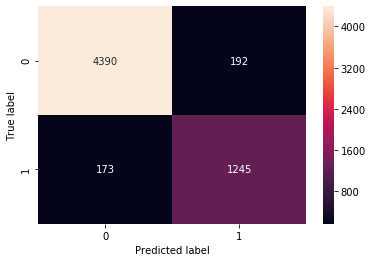

In [72]:
sns.heatmap(confusion_matrix(y_test, knn_model_predictions),annot = True, fmt = 'g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [74]:
rnd_clf = RandomForestClassifier()

In [75]:
param_grid = [{'n_estimators':[100,200,300,400]}]

In [76]:
grid_search = GridSearchCV(rnd_clf, param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(X_train_tr, y_train)

print("\nBest parameters")
print(grid_search.best_params_)

print("\nBest estimator")
print(grid_search.best_estimator_)

print("\nBest AUC score")
print(grid_search.best_score_)


Best parameters
{'n_estimators': 300}

Best estimator
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Best AUC score
0.9773328598672752


In [77]:
rnd_final_model = grid_search.best_estimator_
rnd_final_model.fit(X_train_tr, y_train)
rnd_final_predictions = rnd_final_model.predict_proba(X_test_tr)
rnd_final_auc = roc_auc_score(y_test, rnd_final_predictions[:,1])
print("\nAUC for test set: ", rnd_final_auc)


AUC for test set:  0.9821442093578908


In [78]:
fpr['Random Forest'], tpr['Random Forest'], threshold = roc_curve(y_test, rnd_final_predictions[:,1])
roc_auc['Random Forest'] = roc_auc_score(y_test, rnd_final_predictions[:,1])
accuracy['Random Forest'] = accuracy_score(y_test, np.argmax(rnd_final_predictions,axis = 1))
f1['Random Forest'] = f1_score(y_test, np.argmax(rnd_final_predictions,axis = 1))
conf_mat['Random Forest'] = confusion_matrix(y_test, np.argmax(rnd_final_predictions,axis = 1))
print(fpr['Random Forest'])
print(tpr['Random Forest'])
print(roc_auc['Random Forest'])
print(accuracy['Random Forest'])
print(f1['Random Forest'])
print(conf_mat['Random Forest'])
print(confusion_matrix(y_test, np.argmax(rnd_final_predictions,axis = 1)))
print(classification_report(y_test, np.argmax(rnd_final_predictions,axis = 1)))

[0.         0.00196421 0.00196421 0.00196421 0.00196421 0.00196421
 0.00196421 0.00196421 0.00218245 0.00218245 0.00218245 0.00218245
 0.00218245 0.00218245 0.00218245 0.00218245 0.00218245 0.00218245
 0.0024007  0.0024007  0.00305543 0.00305543 0.00305543 0.00305543
 0.00305543 0.00305543 0.00327368 0.00327368 0.00327368 0.00327368
 0.00327368 0.00327368 0.00327368 0.00327368 0.00327368 0.00327368
 0.00327368 0.00327368 0.00327368 0.00327368 0.00327368 0.00327368
 0.00327368 0.00327368 0.00327368 0.00327368 0.00327368 0.00327368
 0.00327368 0.00327368 0.00327368 0.00371017 0.00371017 0.00371017
 0.00371017 0.00371017 0.00371017 0.00371017 0.00392842 0.00392842
 0.00392842 0.00392842 0.00392842 0.00392842 0.00392842 0.00392842
 0.00392842 0.00414666 0.00414666 0.00414666 0.00414666 0.00414666
 0.00414666 0.00414666 0.00414666 0.00414666 0.00414666 0.00414666
 0.00501964 0.00523789 0.00523789 0.00523789 0.00567438 0.00567438
 0.00567438 0.00567438 0.00567438 0.00567438 0.00567438 0.0056

Text(0.5, 15.0, 'Predicted label')

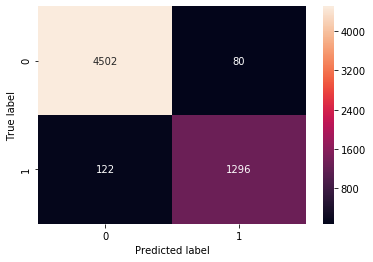

In [79]:
sns.heatmap(confusion_matrix(y_test, np.argmax(rnd_final_predictions,axis=1)),annot = True, fmt = 'g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# SVC

In [80]:
svc = SVC()

In [81]:
# param_grid = [{'kernel': ['linear'],'C': [0.01,0.1,1,10,100]},
#               {'kernel': ['rbf'],'C': [0.01,0.1,1,10,100],'gamma': ['auto']},
#               {'kernel': ['poly'],'C': [0.01,0.1,1,10,100],'gamma': ['auto'],'degree': [2,4,6]}]

param_grid = [{'kernel': ['rbf'],'C': [0.01,0.1,1,10,100],'gamma': ['auto']}]
#param_grid = [{'kernel': ['linear'],'C': [0.01,0.1,1,10,100]}]

In [82]:
grid_search = GridSearchCV(svc, param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(X_train_tr, y_train)
cvres = grid_search.cv_results_

In [83]:
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(mean_score,params)

0.9564324717870821 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
0.9654117561972825 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.9729372543637685 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.9734031335943267 {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.971997785138985 {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [84]:
print("\nBest parameters")
print(grid_search.best_params_)

print("\nBest estimator")
print(grid_search.best_estimator_)

print("\nBest AUC score")
print(grid_search.best_score_)


Best parameters
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Best estimator
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Best AUC score
0.9734031335943267


In [85]:
svc_final_model = grid_search.best_estimator_
svc_final_model.fit(X_train_tr, y_train)
svc_final_predictions = svc_final_model.predict(X_test_tr)
svc_final_auc = roc_auc_score(y_test, svc_final_predictions)
print("\nAUC for test set: ", svc_final_auc)


AUC for test set:  0.9435254097255528


In [86]:
fpr['SVC'], tpr['SVC'], threshold = roc_curve(y_test, svc_final_predictions)
roc_auc['SVC'] = roc_auc_score(y_test, svc_final_predictions)
accuracy['SVC'] = accuracy_score(y_test, svc_final_predictions)
f1['SVC'] = f1_score(y_test, svc_final_predictions)
conf_mat['SVC'] = confusion_matrix(y_test, svc_final_predictions)
print(fpr['SVC'])
print(tpr['SVC'])
print(roc_auc['SVC'])
print(accuracy['SVC'])
print(f1['SVC'])
print(conf_mat['SVC'])
print(confusion_matrix(y_test,svc_final_predictions))
print(classification_report(y_test,svc_final_predictions))

[0.         0.01986032 1.        ]
[0.         0.90691114 1.        ]
0.9435254097255528
0.9628333333333333
0.9202146690518784
[[4491   91]
 [ 132 1286]]
[[4491   91]
 [ 132 1286]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4582
           1       0.93      0.91      0.92      1418

    accuracy                           0.96      6000
   macro avg       0.95      0.94      0.95      6000
weighted avg       0.96      0.96      0.96      6000



Text(0.5, 15.0, 'Predicted label')

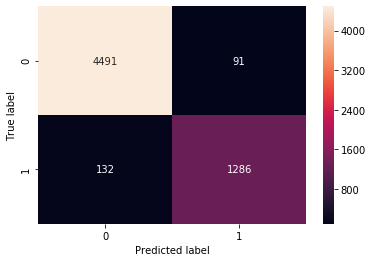

In [87]:
sns.heatmap(confusion_matrix(y_test,svc_final_predictions),annot = True, fmt = 'g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# AdaBoost Classifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
abc_model = abc.fit(X_train_tr, y_train)
abc_pred = abc_model.predict(X_test_tr)

In [90]:
fpr['AdaBoost'], tpr['AdaBoost'], threshold = roc_curve(y_test, abc_pred)
roc_auc['AdaBoost'] = roc_auc_score(y_test, abc_pred)
accuracy['AdaBoost'] = accuracy_score(y_test, abc_pred)
f1['AdaBoost'] = f1_score(y_test, abc_pred)
conf_mat['AdaBoost'] = confusion_matrix(y_test, abc_pred)
print(fpr['AdaBoost'])
print(tpr['AdaBoost'])
print(roc_auc['AdaBoost'])
print(accuracy['AdaBoost'])
print(f1['AdaBoost'])
print(conf_mat['AdaBoost'])
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

[0.         0.03099083 1.        ]
[0.         0.83850494 1.        ]
0.9037570514166244
0.9381666666666667
0.8650418333939615
[[4440  142]
 [ 229 1189]]
[[4440  142]
 [ 229 1189]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4582
           1       0.89      0.84      0.87      1418

    accuracy                           0.94      6000
   macro avg       0.92      0.90      0.91      6000
weighted avg       0.94      0.94      0.94      6000



Text(0.5, 15.0, 'Predicted label')

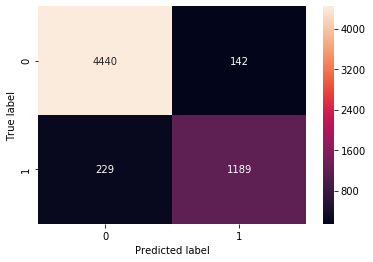

In [91]:
sns.heatmap(confusion_matrix(y_test,abc_pred),annot = True, fmt = 'g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [92]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC()

In [93]:
# param_grid = {'C': [0.01,0.1,1,10,100]}
# grid_search = GridSearchCV(svc, param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1)
# grid_search.fit(X_train_tr, y_train)
# cvres = grid_search.cv_results_

param_grid = {'C': [0.01,0.1,1,10,100]}
grid_search = GridSearchCV(linearSVC, param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1)
grid_search.fit(X_train_pol, y_train_pol)
cvres = grid_search.cv_results_

In [94]:
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(mean_score,params)

0.9725503701215886 {'C': 0.01}
0.9711157474146319 {'C': 0.1}
0.9669540038983526 {'C': 1}
0.9638909369871839 {'C': 10}
0.9627668591451496 {'C': 100}


In [95]:
print("\nBest parameters")
print(grid_search.best_params_)

print("\nBest estimator")
print(grid_search.best_estimator_)

print("\nBest AUC score")
print(grid_search.best_score_)


Best parameters
{'C': 0.01}

Best estimator
LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Best AUC score
0.9725503701215886


In [96]:
# linearsvc_final_model = grid_search.best_estimator_
# linearsvc_final_model.fit(X_train_tr, y_train)
# linearsvc_final_predictions = svc_final_model.predict(X_test_tr)
# linearsvc_final_auc = roc_auc_score(y_test, svc_final_predictions)
# print("\nAUC for test set: ", svc_final_auc)

linearsvc_final_model = grid_search.best_estimator_
linearsvc_final_model.fit(X_train_pol, y_train_pol)
linearsvc_final_predictions = linearsvc_final_model.predict(X_test_pol)
linearsvc_final_auc = roc_auc_score(y_test_pol, linearsvc_final_predictions)
print("\nAUC for test set: ", linearsvc_final_auc)


AUC for test set:  0.9369683541225584


In [97]:
print(classification_report(y_test_pol,linearsvc_final_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4582
           1       0.94      0.89      0.92      1418

    accuracy                           0.96      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.96      0.96      0.96      6000



# Evaluation of Models

## F1 Score

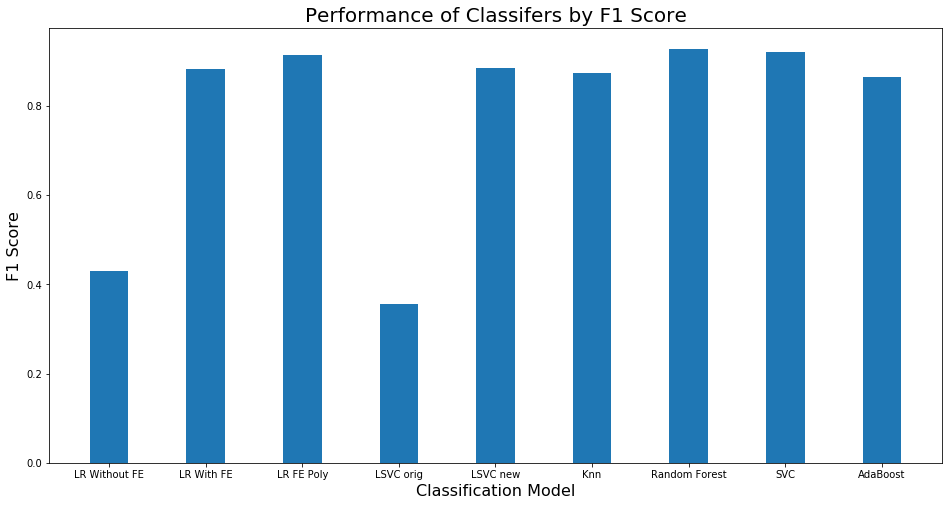

In [98]:
bar_width = 0.4
plt.figure(figsize=(16,8))
#plt.ylim((0.9,1.0))
plt.bar(range(len(f1)),f1.values(),bar_width,align='center')
plt.xticks(range(len(f1)), f1.keys())
plt.xlabel('Classification Model',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('Performance of Classifers by F1 Score',fontsize=20)
plt.show()

## ROC AUC Score

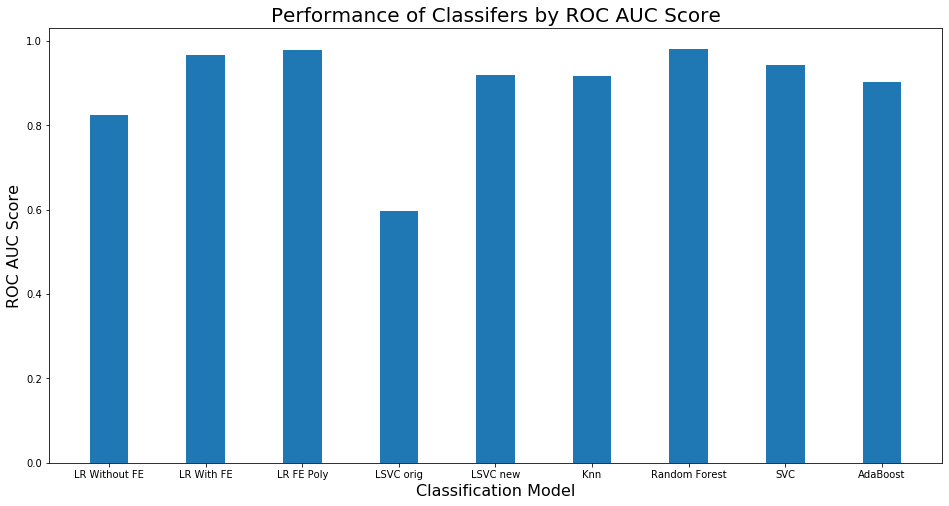

In [99]:
bar_width = 0.4
plt.figure(figsize=(16,8))
#plt.ylim((0.9,1.0))
plt.bar(range(len(roc_auc)),roc_auc.values(),bar_width,align='center')
plt.xticks(range(len(roc_auc)), roc_auc.keys())
plt.xlabel('Classification Model',fontsize=16)
plt.ylabel('ROC AUC Score',fontsize=16)
plt.title('Performance of Classifers by ROC AUC Score',fontsize=20)
plt.show()

## Confusion Matrices

In [100]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix for ' + title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],4),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout();
    plt.ylabel('True label');
    plt.xlabel('Predicted label')

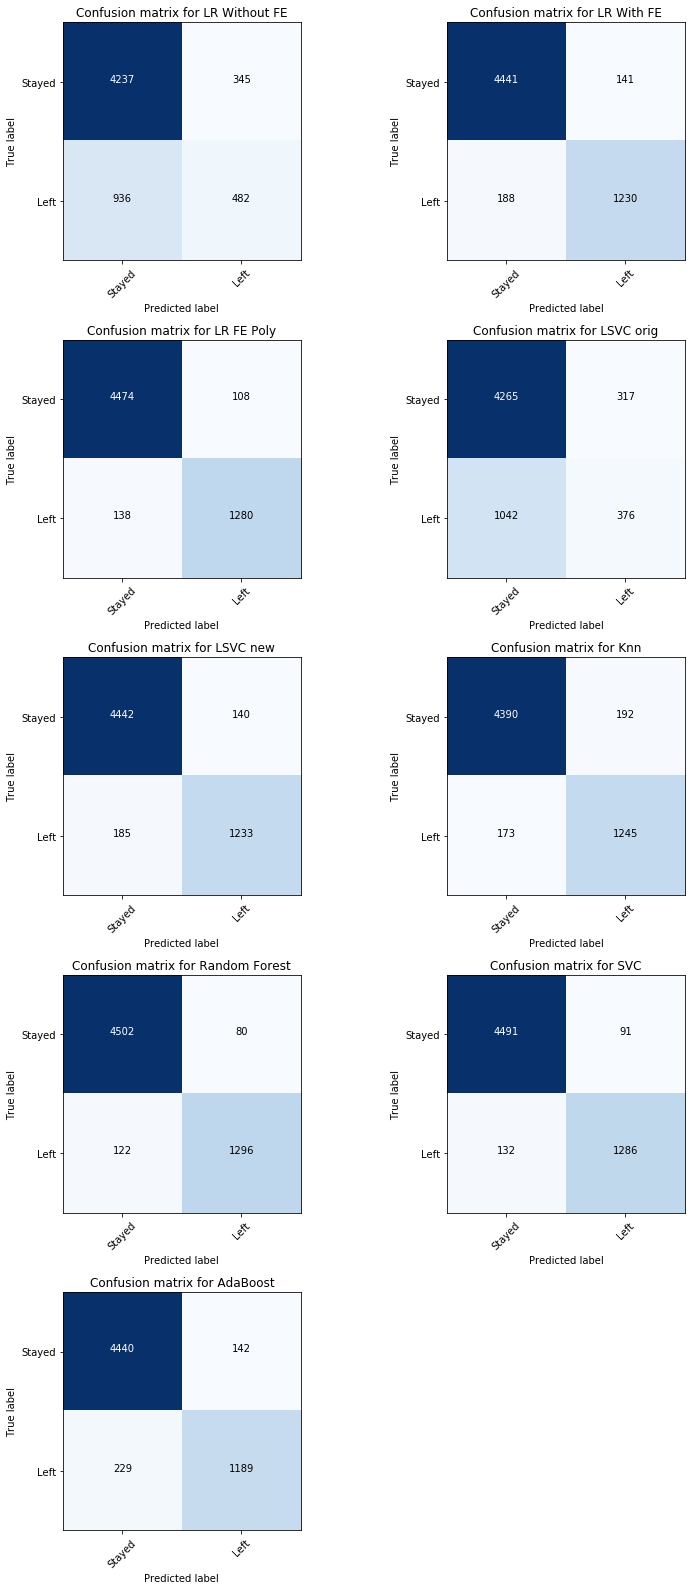

In [101]:
fig = plt.figure(figsize=(12,22))
i=1
for key,val in conf_mat.items():
    plt.subplot(5,2,i);
    i+=1
    plot_confusion_matrix(val,classes=['Stayed','Left'], normalize=False,title=key)

## ROC Curve

In [102]:
def plot_roc_curve(cm, normalize=False,
                          #title='ROC curve',
                       title=key,
                          cmap=plt.cm.Blues):
    plt.title('ROC for ' + title)
    plt.plot(fpr[key], tpr[key], 'b', label = 'AUC = %0.2f' % roc_auc[key])
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.tight_layout();

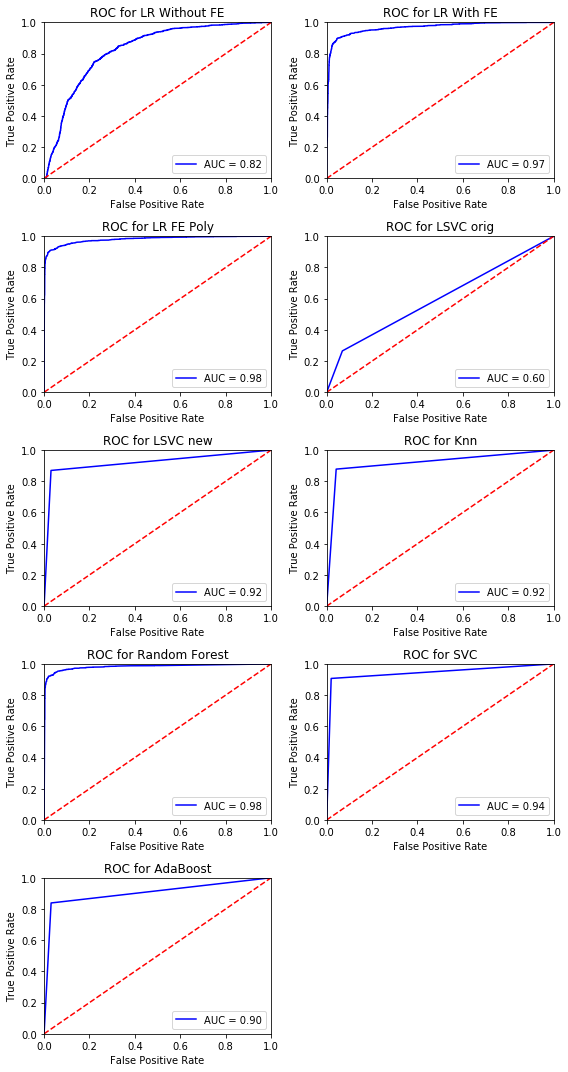

In [103]:
fig = plt.figure(figsize=(8,15))
i=1
for key,val in roc_auc.items():
    plt.subplot(5,2,i);
    i+=1
    plot_roc_curve(val,normalize=False,
                      title = key)

In [ ]:
print(roc_auc)